## Plotting regressions in python for composite plot in my paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import seaborn as sns
from scipy.stats import linregress

# load the data and drop NaNs
SM23_avg = pd.read_csv('SM23_Dsed_vs_hypflux_avg.csv').dropna()
SM23_traps = pd.read_csv('SM23_Dsed_vs_hypflux_trap_pairs.csv').dropna()
SP23_avg = pd.read_csv('SP23_Dsed_vs_hypflux_avg.csv').dropna()
SP23_traps = pd.read_csv('SP23_Dsed_vs_hypflux_trap_pairs.csv').dropna()

In [2]:
def plot_with_r2(ax, x, y, data, color, label=None, marker='o'):
    sns.set_style("whitegrid")
    sns.regplot(x=x, y=y, data=data, ax=ax, color=color, ci=None, truncate=False,
                marker=marker, line_kws={'linewidth': 1.5}, 
                scatter_kws={'edgecolor': 'black', 'linewidths': 1, 'zorder':5}, label=label)
    
    # drop NaNs to avoid errors in regression
    x_vals = data[x]
    y_vals = data[y]
    valid = x_vals.notna() & y_vals.notna()
    slope, intercept, r_value, p_value, std_err = linregress(x_vals[valid], y_vals[valid])
    
    r_squared = r_value ** 2
    return r_squared, p_value

#### Total Sediment Weights

Averages

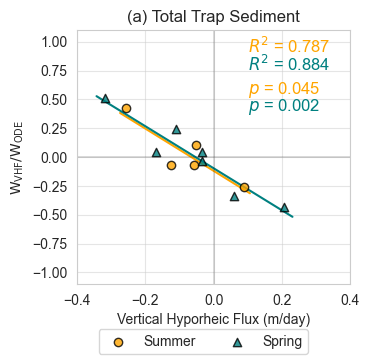

P-values for linear regressions:
Avg Total Sediment (Summer): 0.044773242216661235
Avg Total Sediment (Spring): 0.0016355438453090495


In [3]:
# Create a 2x2 grid of subplots
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(3.8, 3.8))
x_limits = (-0.4, 0.4)

# Total Sediment
r2_sm23, pval_sm23 = plot_with_r2(ax, 'flux', 'total', SM23_avg, color='orange', label='Summer')
r2_sp23, pval_sp23 = plot_with_r2(ax, 'flux', 'total', SP23_avg, color='teal', label='Spring', marker='^')
ax.text(0.1, 0.9, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=12)
ax.text(0.1, 0.75, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=12)
ax.text(0.1, 0.55, f'$p$ = {pval_sm23:.3f}', color='orange', size=12)
ax.text(0.1, 0.4, f'$p$ = {pval_sp23:.3f}', color='teal', size=12)
ax.set_xlim(x_limits)
ax.set_title('(a) Total Trap Sediment')

ax.axhline(0, color='black', lw=0.2)
ax.axvline(0, color='black', lw=0.2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
ax.set_ylabel(r'$\mathrm{W}_{\mathrm{VHF}} / \mathrm{W}_{\mathrm{ODE}}$')
ax.grid(alpha=0.5)

ax.legend(bbox_to_anchor=(0.87, -0.15), ncol=2)
plt.tight_layout()
plt.savefig('plots/totalsed_avg_new.jpg', dpi=1000)
plt.show()

# Print the p-values:
print("P-values for linear regressions:")
print(f"Avg Total Sediment (Summer): {pval_sm23}")
print(f"Avg Total Sediment (Spring): {pval_sp23}")

Different location of p-value and r2

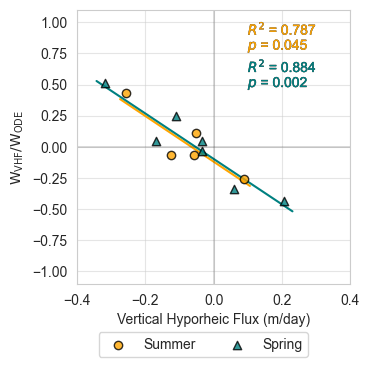

P-values for linear regressions:
Avg Total Sediment (Summer): 0.044773242216661235
Avg Total Sediment (Spring): 0.0016355438453090495


In [4]:
# Create a 2x2 grid of subplots
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(3.8, 3.8))
x_limits = (-0.4, 0.4)

# Total Sediment
r2_sm23, pval_sm23 = plot_with_r2(ax, 'flux', 'total', SM23_avg, color="orange", label='Summer')
r2_sp23, pval_sp23 = plot_with_r2(ax, 'flux', 'total', SP23_avg, color="teal", label='Spring', marker='^')

t1 = ax.text(0.1, 0.9, f'$R^2$ = {r2_sm23:.3f}', color="orange", size=10)
t2 = ax.text(0.1, 0.78, f'$p$ = {pval_sm23:.3f}', color="orange", size=10)
t3 = ax.text(0.1, 0.6, f'$R^2$ = {r2_sp23:.3f}', color="teal", size=10)
t4 = ax.text(0.1, 0.48, f'$p$ = {pval_sp23:.3f}', color="teal", size=10)
for t in [t1, t2, t3, t4]:
    t.set_path_effects([pe.withStroke(linewidth=0.25, foreground="black")])

ax.set_xlim(x_limits)

ax.axhline(0, color='black', lw=0.2)
ax.axvline(0, color='black', lw=0.2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
ax.set_ylabel(r'$\mathrm{W}_{\mathrm{VHF}} / \mathrm{W}_{\mathrm{ODE}}$')
ax.grid(alpha=0.5)

ax.legend(bbox_to_anchor=(0.87, -0.15), ncol=2)
plt.tight_layout()
plt.savefig('plots/totalsed_avg_V7.jpg', dpi=1000)
plt.show()

# print the p-values:
print("P-values for linear regressions:")
print(f"Avg Total Sediment (Summer): {pval_sm23}")
print(f"Avg Total Sediment (Spring): {pval_sp23}")

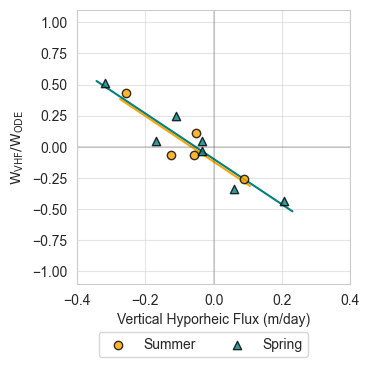

P-values for linear regressions:
Avg Total Sediment (Summer): 0.044773242216661235
Avg Total Sediment (Spring): 0.0016355438453090495


In [10]:
teal = '#107070'
orange = '#df9c20'

# Create a 2x2 grid of subplots
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 1, figsize=(3.8, 3.8))
x_limits = (-0.4, 0.4)

# Total Sediment
r2_sm23, pval_sm23 = plot_with_r2(ax, 'flux', 'total', SM23_avg, color='orange', label='Summer')
r2_sp23, pval_sp23 = plot_with_r2(ax, 'flux', 'total', SP23_avg, color='teal', label='Spring', marker='^')

#t1 = ax.text(0.19, 0.99, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=10)
#t2 = ax.text(0.19, 0.88, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=10)
#t3 = ax.text(0.19, 0.7, f'$p$ = {pval_sm23:.3f}', color='orange', size=10)
#t4 = ax.text(0.19, 0.58, f'$p$ = {pval_sp23:.3f}', color='teal', size=10)
#for t in [t1, t2, t3, t4]:
#    t.set_path_effects([pe.withStroke(linewidth=0.25, foreground="black")])

ax.set_xlim(x_limits)

ax.axhline(0, color='black', lw=0.2)
ax.axvline(0, color='black', lw=0.2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
ax.set_ylabel(r'$\mathrm{W}_{\mathrm{VHF}} / \mathrm{W}_{\mathrm{ODE}}$')
ax.grid(alpha=0.5)

ax.legend(bbox_to_anchor=(0.87, -0.15), ncol=2)
plt.tight_layout()
plt.savefig('plots/totalsed_avg_V7_nometrics.jpg', dpi=1000)
plt.show()

# print the p-values:
print("P-values for linear regressions:")
print(f"Avg Total Sediment (Summer): {pval_sm23}")
print(f"Avg Total Sediment (Spring): {pval_sp23}")

Trap Pair

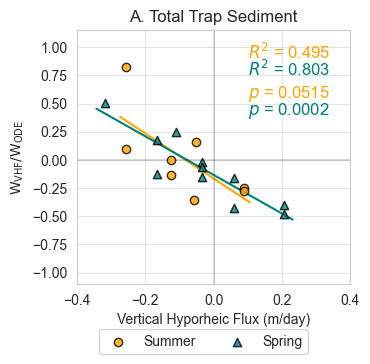

P-values for linear regressions:
Trap Pair Total Sediment (Summer): 0.05148188056543357
Trap Pair Total Sediment (Spring): 0.0001890043610338611


In [4]:
# Create a 2x2 grid of subplots
fig, ax = plt.subplots(1, 1, figsize=(3.8, 3.8))
x_limits = (-0.4, 0.4)

# Total Sediment
r2_sm23, pval_sm23 = plot_with_r2(ax, 'flux', 'total', SM23_traps, color='orange', label='Summer')
r2_sp23, pval_sp23 = plot_with_r2(ax, 'flux', 'total', SP23_traps, color='teal', marker='^', label='Spring')
ax.text(0.1, 0.9, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=12)
ax.text(0.1, 0.75, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=12)
ax.text(0.1, 0.55, f'$p$ = {pval_sm23:.4f}', color='orange', size=12)
ax.text(0.1, 0.4, f'$p$ = {pval_sp23:.4f}', color='teal', size=12)
ax.set_xlim(x_limits)
ax.set_title('A. Total Trap Sediment')

ax.axhline(0, color='black', lw=0.2)
ax.axvline(0, color='black', lw=0.2)
ax.set_ylim(-1.1, 1.15)
ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
ax.set_ylabel(r'$\mathrm{W}_{\mathrm{VHF}} / \mathrm{W}_{\mathrm{ODE}}$')
ax.grid(alpha=0.5)

ax.legend(bbox_to_anchor=(0.87, -0.15), ncol=2)
plt.tight_layout()
plt.savefig('plots/totalsed_trap_pairs_new.jpg', dpi=1000)
plt.show()

# Print the p-values:\
print("P-values for linear regressions:")
print(f"Trap Pair Total Sediment (Summer): {pval_sm23}")
print(f"Trap Pair Total Sediment (Spring): {pval_sp23}")

#### Subplots - Different Grain Sizes

Average

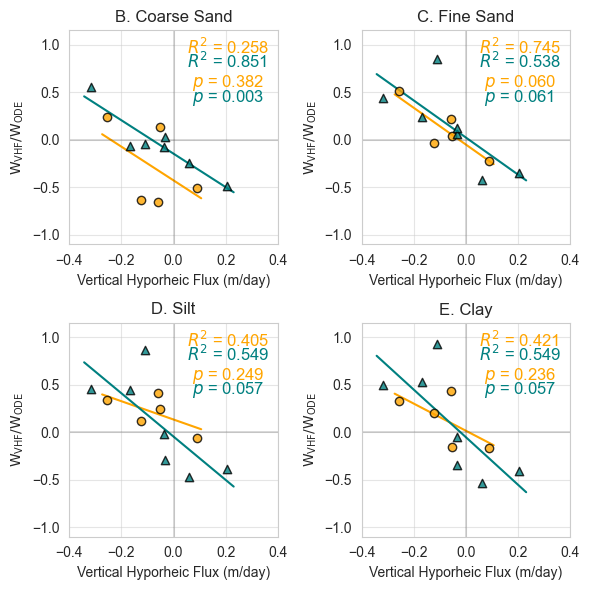

P-values for linear regressions:
Coarse Sand (Summer): 0.3824179633205153, R2: 0.257866434791485
Coarse Sand (Spring): 0.003085536475134849, R2: 0.8508861439915856
Fine Sand (Summer): 0.0595283079128849, R2: 0.7449747432401221
Fine Sand (Spring): 0.0605458473154986, R2: 0.5382590228560091
Silt (Summer): 0.24855159404739594, R2: 0.404722260361326
Silt (Spring): 0.05674732050130318, R2: 0.5489596546579477
Clay (Summer): 0.23595742006380227, R2: 0.42131560479294244
Clay (Spring): 0.05687017610906966, R2: 0.548605903528389


In [5]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
ax1, ax2, ax3, ax4 = axs.flatten()
x_limits = (-0.4, 0.4)

# Coarse sand
r2_sm23_CS, p_sm23_CS = plot_with_r2(ax1, 'flux', 'CS', SM23_avg, color='orange')
r2_sp23_CS, p_sp23_CS = plot_with_r2(ax1, 'flux', 'CS', SP23_avg, color='teal', marker='^')
ax1.text(0.05, 0.9, f'$R^2$ = {r2_sm23_CS:.3f}', color='orange', size=12)
ax1.text(0.05, 0.75, f'$R^2$ = {r2_sp23_CS:.3f}', color='teal', size=12)
ax1.text(0.07, 0.55, f'$p$ = {p_sm23_CS:.3f}', color='orange', size=12)
ax1.text(0.07, 0.4, f'$p$ = {p_sp23_CS:.3f}', color='teal', size=12)

ax1.set_xlim(x_limits)
ax1.set_title('B. Coarse Sand')

# Fine sand
r2_sm23_FS, p_sm23_FS = plot_with_r2(ax2, 'flux', 'FS', SM23_avg, color='orange')
r2_sp23_FS, p_sp23_FS = plot_with_r2(ax2, 'flux', 'FS', SP23_avg, color='teal', marker='^')
ax2.text(0.05, 0.9, f'$R^2$ = {r2_sm23_FS:.3f}', color='orange', size=12)
ax2.text(0.05, 0.75, f'$R^2$ = {r2_sp23_FS:.3f}', color='teal', size=12)
ax2.text(0.07, 0.55, f'$p$ = {p_sm23_FS:.3f}', color='orange', size=12)
ax2.text(0.07, 0.4, f'$p$ = {p_sp23_FS:.3f}', color='teal', size=12)
ax2.set_xlim(x_limits)
ax2.set_title('C. Fine Sand')

# Silt
r2_sm23_S, p_sm23_S = plot_with_r2(ax3, 'flux', 'S', SM23_avg, color='orange')
r2_sp23_S, p_sp23_S = plot_with_r2(ax3, 'flux', 'S', SP23_avg, color='teal', marker='^')
ax3.text(0.05, 0.9, f'$R^2$ = {r2_sm23_S:.3f}', color='orange', size=12)
ax3.text(0.05, 0.75, f'$R^2$ = {r2_sp23_S:.3f}', color='teal', size=12)
ax3.text(0.07, 0.55, f'$p$ = {p_sm23_S:.3f}', color='orange', size=12)
ax3.text(0.07, 0.4, f'$p$ = {p_sp23_S:.3f}', color='teal', size=12)
ax3.set_xlim(x_limits)
ax3.set_ylabel(r'$\Delta$sed*')
ax3.set_title('D. Silt')

# Clay
r2_sm23_C, p_sm23_C = plot_with_r2(ax4, 'flux', 'C', SM23_avg, color='orange')
r2_sp23_C, p_sp23_C = plot_with_r2(ax4, 'flux', 'C', SP23_avg, color='teal', marker='^')
ax4.text(0.05, 0.9, f'$R^2$ = {r2_sm23_C:.3f}', color='orange', size=12)
ax4.text(0.05, 0.75, f'$R^2$ = {r2_sp23_C:.3f}', color='teal', size=12)
ax4.text(0.07, 0.55, f'$p$ = {p_sm23_C:.3f}', color='orange', size=12)
ax4.text(0.07, 0.4, f'$p$ = {p_sp23_C:.3f}', color='teal', size=12)
ax4.set_xlim(x_limits)
ax4.set_title('E. Clay')

# Format all axes
for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(0, color='black', lw=0.2)
    ax.axvline(0, color='black', lw=0.2)
    ax.set_ylim(-1.1, 1.15)
    ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
    ax.set_ylabel(r'$\mathrm{W}_{\mathrm{VHF}} / \mathrm{W}_{\mathrm{ODE}}$')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.savefig('plots/grain_sizes_avg_new.jpg', dpi=1000)
plt.show()

# Then at the end of your script, print the p-values:
print("P-values for linear regressions:")
print(f"Coarse Sand (Summer): {p_sm23_CS}, R2: {r2_sm23_CS}")
print(f"Coarse Sand (Spring): {p_sp23_CS}, R2: {r2_sp23_CS}")
print(f"Fine Sand (Summer): {p_sm23_FS}, R2: {r2_sm23_FS}")
print(f"Fine Sand (Spring): {p_sp23_FS}, R2: {r2_sp23_FS}")
print(f"Silt (Summer): {p_sm23_S}, R2: {r2_sm23_S}")
print(f"Silt (Spring): {p_sp23_S}, R2: {r2_sp23_S}")
print(f"Clay (Summer): {p_sm23_C}, R2: {r2_sm23_C}")
print(f"Clay (Spring): {p_sp23_C}, R2: {r2_sp23_C}")

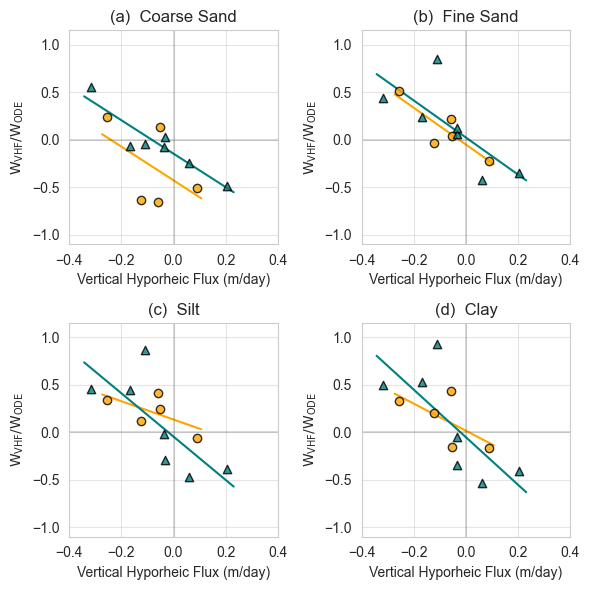

In [14]:
# no R2 values on plot
# Create a 2x2 grid of subplots
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
ax1, ax2, ax3, ax4 = axs.flatten()
x_limits = (-0.4, 0.4)

# Coarse sand
r2_sm23_CS, p_sm23_CS = plot_with_r2(ax1, 'flux', 'CS', SM23_avg, color='orange')
r2_sp23_CS, p_sp23_CS = plot_with_r2(ax1, 'flux', 'CS', SP23_avg, color='teal', marker='^')
ax1.set_xlim(x_limits)
ax1.set_title('(a)  Coarse Sand', fontsize=12)

# Fine sand
r2_sm23_FS, p_sm23_FS = plot_with_r2(ax2, 'flux', 'FS', SM23_avg, color='orange')
r2_sp23_FS, p_sp23_FS = plot_with_r2(ax2, 'flux', 'FS', SP23_avg, color='teal', marker='^')
ax2.set_xlim(x_limits)
ax2.set_title('(b)  Fine Sand', fontsize=12)

# Silt
r2_sm23_S, p_sm23_S = plot_with_r2(ax3, 'flux', 'S', SM23_avg, color='orange')
r2_sp23_S, p_sp23_S = plot_with_r2(ax3, 'flux', 'S', SP23_avg, color='teal', marker='^')
ax3.set_xlim(x_limits)
ax3.set_title('(c)  Silt', fontsize=12)

# Clay
r2_sm23_C, p_sm23_C = plot_with_r2(ax4, 'flux', 'C', SM23_avg, color='orange')
r2_sp23_C, p_sp23_C = plot_with_r2(ax4, 'flux', 'C', SP23_avg, color='teal', marker='^')
ax4.set_xlim(x_limits)
ax4.set_title('(d)  Clay', fontsize=12)

# Format all axes
for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(0, color='black', lw=0.2)
    ax.axvline(0, color='black', lw=0.2)
    ax.set_ylim(-1.1, 1.15)
    ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
    ax.set_ylabel(r'$\mathrm{W}_{\mathrm{VHF}} / \mathrm{W}_{\mathrm{ODE}}$')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.savefig('plots/grain_sizes_avg_new_nor2.jpg', dpi=1000)
plt.show()


Trap Pairs

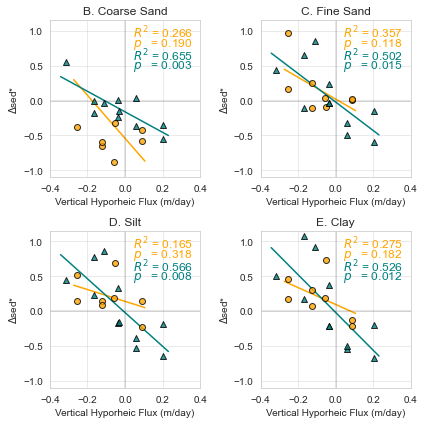

P-values for linear regressions:
Coarse Sand (Summer): 0.19042479405837334
Coarse Sand (Spring): 0.0025411407120411286
Fine Sand (Summer): 0.11774154393155216
Fine Sand (Spring): 0.014659798296875817
Silt (Summer): 0.3180988153652073
Silt (Spring): 0.007540596391619828
Clay (Summer): 0.18208774936162508
Clay (Spring): 0.011527700979073172


In [43]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(6, 6))
ax1, ax2, ax3, ax4 = axs.flatten()
x_limits = (-0.4, 0.4)

# Coarse sand
r2_sm23, p_sm23_CS = plot_with_r2(ax1, 'flux', 'CS', SM23_traps, color='orange')
r2_sp23, p_sp23_CS = plot_with_r2(ax1, 'flux', 'CS', SP23_traps, color='teal', marker='^')
ax1.text(0.04, 0.9, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=12)
ax1.text(0.04, 0.78, f'$p$   = {p_sm23_CS:.3f}', color='orange', size=12)
ax1.text(0.04, 0.57, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=12)
ax1.text(0.04, 0.46, f'$p$   = {p_sp23_CS:.3f}', color='teal', size=12)
ax1.set_xlim(x_limits)
ax1.set_ylabel(r'$\Delta$sed*')
ax1.set_title('B. Coarse Sand')

# Fine sand
r2_sm23, p_sm23_FS = plot_with_r2(ax2, 'flux', 'FS', SM23_traps, color='orange')
r2_sp23, p_sp23_FS = plot_with_r2(ax2, 'flux', 'FS', SP23_traps, color='teal', marker='^')
ax2.text(0.04, 0.9, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=12)
ax2.text(0.04, 0.78, f'$p$   = {p_sm23_FS:.3f}', color='orange', size=12)
ax2.text(0.04, 0.57, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=12)
ax2.text(0.04, 0.46, f'$p$   = {p_sp23_FS:.3f}', color='teal', size=12)
ax2.set_xlim(x_limits)
ax2.set_title('C. Fine Sand')

# Silt
r2_sm23, p_sm23_S = plot_with_r2(ax3, 'flux', 'S', SM23_traps, color='orange')
r2_sp23, p_sp23_S = plot_with_r2(ax3, 'flux', 'S', SP23_traps, color='teal', marker='^')
ax3.text(0.04, 0.9, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=12)
ax3.text(0.04, 0.78, f'$p$   = {p_sm23_S:.3f}', color='orange', size=12)
ax3.text(0.04, 0.57, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=12)
ax3.text(0.04, 0.46, f'$p$   = {p_sp23_S:.3f}', color='teal', size=12)
ax3.set_xlim(x_limits)
ax3.set_ylabel(r'$\Delta$sed*')
ax3.set_title('D. Silt')

# Clay
r2_sm23, p_sm23_C = plot_with_r2(ax4, 'flux', 'C', SM23_traps, color='orange')
r2_sp23, p_sp23_C = plot_with_r2(ax4, 'flux', 'C', SP23_traps, color='teal', marker='^')
ax4.text(0.04, 0.9, f'$R^2$ = {r2_sm23:.3f}', color='orange', size=12)
ax4.text(0.04, 0.78, f'$p$   = {p_sm23_C:.3f}', color='orange', size=12)
ax4.text(0.04, 0.57, f'$R^2$ = {r2_sp23:.3f}', color='teal', size=12)
ax4.text(0.04, 0.46, f'$p$   = {p_sp23_C:.3f}', color='teal', size=12)
ax4.set_xlim(x_limits)
ax4.set_title('E. Clay')

# Format all axes
for ax in [ax1, ax2, ax3, ax4]:
    ax.axhline(0, color='black', lw=0.2)
    ax.axvline(0, color='black', lw=0.2)
    ax.set_ylim(-1.1, 1.15)
    ax.set_xlabel('Vertical Hyporheic Flux (m/day)')
    ax.set_ylabel(r'$\Delta$sed*')
    ax.grid(alpha=0.5)

plt.tight_layout()
plt.savefig('plots/grain_sizes_trap_pairs.jpg', dpi=1000)
plt.show()

# Then at the end of your script, print the p-values:
print("P-values for linear regressions:")
print(f"Coarse Sand (Summer): {p_sm23_CS}")
print(f"Coarse Sand (Spring): {p_sp23_CS}")
print(f"Fine Sand (Summer): {p_sm23_FS}")
print(f"Fine Sand (Spring): {p_sp23_FS}")
print(f"Silt (Summer): {p_sm23_S}")
print(f"Silt (Spring): {p_sp23_S}")
print(f"Clay (Summer): {p_sm23_C}")
print(f"Clay (Spring): {p_sp23_C}")